## Preprocess the sequence vectors

We want to preprocess the obtained data vectors which represent the sentences, to obtain the maximal information out of it. We follow the procedure proposed by Montavon et. al. 2012 [https://www-cs.stanford.edu/~acoates/papers/coatesng_nntot2012.pdf] which is developed for k-means clustering.

We consider the input vectors given by $(x_1, ..., x_n) \subset \mathbb{R}^N$ which all present one sentence. 

Two stages where presented in the preprocessing procedure
1. Normalize the data.
For each $i = 1,\dots,n$ 
\begin{align}
    x^{(i)} := \frac{x^{(i)} - \text{mean}(x^{(i)}) }{\sqrt{\text{Var}(x^{(i)}) - \epsilon_{norm} } } 
\end{align}
where $\epsilon_{norm}$ can be seen as a free parameter.
2. Whitening the data
We use the so called ZCA or For each $i = 1,\dots,n$ 
\begin{align}
    V D V^T = eig(cov(x))\\
    x^{(i)} := V(D + \epsilon_{ZCA})^{-\frac{1}{2}} V^T x^{(i)} 
\end{align}

We have two datasets. First the SST dataset for sentiment analysis. Second the EBuero dataset.

We want to measure the impact of these procedures by the following measures
1. Size of variance in the cluster (K-Means euclidean).
2. Number of different cluster for the templates (possible for DBSCAN and K-Means)


In [4]:
# Load modules
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE


resultPath = os.path.join(os.getcwd(), '../results/')


In [5]:
# Define the parameter
options = {}

options['clustAlgo'] = 'kmeans'
options['distance'] = 'euclidean'
options['sentRep'] = 'ft'

######

## Load the data:

1. Non Processed Data
2. Noramlized Data
3. Whitened and Normalized Data


In [ ]:
split = 'smallSample'

if options['clustAlgo'] == 'dbscan':
    dataName = '{0}_db2_{1}_{2}'.format(options['clustAlgo'], options['distance'], options['sentRep'])
    unprocData = pickle.load(open(resultPath + dataName + '.p', 'rb'))
    normalData = pickle.load(open(resultPath + dataName + '_normal' '.p', 'rb'))
    #whitenedData = pickle.load(open(resultPath + dataName + '_whiten' '.p', 'rb'))
    
    
if options['clustAlgo'] == 'kmeans':
    dataName = 'kmeans_db2'
    unprocData = pickle.load(open(resultPath + dataName + '.p', 'rb'))
    normalData = pickle.load(open(resultPath + dataName + '_normal' '.p', 'rb'))
    #whitenedData = pickle.load(open(resultPath + dataName + '_whiten' '.p', 'rb'))
    
    necessaryData = {}
    necessaryData['dataVectsUnProc'] = []
    necessaryData['dataVectsNormal'] =[]
    necessaryData['isTemplate'] = []
    necessaryData['unprocLabel'] = []
    necessaryData['normalLabel'] = []
    necessaryData['sentence'] = []
    #necessaryData['whitenLabel'] = []
    
    if options['sentRep'] == 'ft':
        dataKey = 'fast_text_vect'
        
    for rowID in range(len(unprocData[split].rows)):
        unprocRow = unprocData[split].rows[rowID]
        normalRow = normalData[split].rows[rowID]
        #whitenRow = whitenedData[split].rows[rowID]
        
        necessaryData['dataVectsUnProc'].append(unprocRow[dataKey])
        necessaryData['dataVectsNormal'].append(normalRow[dataKey])
        necessaryData['isTemplate'].append(unprocRow['isTemplate'])
        
        necessaryData['unprocLabel'].append(unprocRow['clust_{0}_kmeans_60'.format(options['sentRep'])])
        necessaryData['normalLabel'].append(normalRow['clust_{0}_kmeans_60'.format(options['sentRep'])])
        #necessaryData['whitenLabel'].append(whitenRow['clust_{0}_kmeans_60'.format(options['sentRep'])])
        
        necessaryData['sentence'].append(unprocRow['sentence'])
    
    necessaryData['unProcDataEmbedded'] = TSNE(n_components=2).fit_transform(np.vstack(necessaryData['dataVectsUnProc']))
    necessaryData['normalDataEmbedded'] = TSNE(n_components=2).fit_transform(np.vstack(necessaryData['dataVectsNormal']))



## Visualise the datasets

Number of cluster for the templates for unprocLabel  : 23
Number of cluster for the templates for normalLabel  : 19


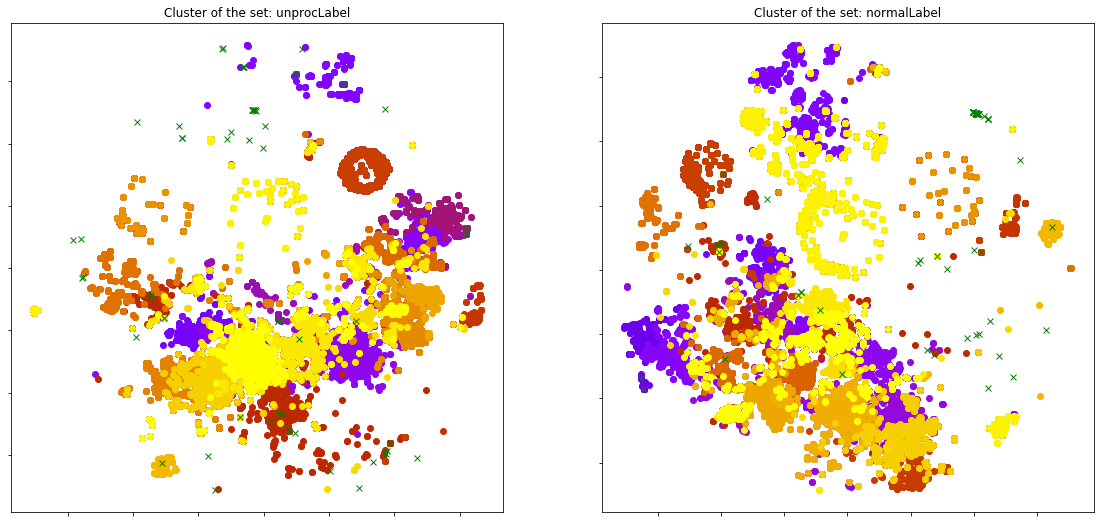

In [119]:
######################################
### Visialize the unprocessed data: ###
######################################



cmap = plt.get_cmap('gnuplot')



fig,ax = plt.subplots(figsize=(30,9))

procLabelKeys = ['unprocLabel','normalLabel'] #'whitenLabel'
vectorKeys = ['unProcDataEmbedded', 'normalDataEmbedded']


for procKeyID in range(len(procKeyList)):
    
    curr_clust = necessaryData[procLabelKeys[procKeyID]]
    curr_proj_vects = necessaryData[vectorKeys[procKeyID]]
    
    # Print the number of cluster for the templates.
    print('Number of cluster for the templates for {0}  : {1}'.format(procLabelKeys[procKeyID], len(set(np.array(curr_clust)[necessaryData['isTemplate']]))))
    listOfClust = list(set(curr_clust))
    
    ax = plt.subplot(1,3, procKeyID +1)
    
    colors = [cmap(i) for i in np.linspace(0, 1, len(listOfClust))]
    
    for i, color in enumerate(colors, start=0):
        clustPoint = curr_clust[i]
        currPoints = list(np.array(curr_clust) == clustPoint)
        pointBatch = ax.plot(curr_proj_vects[currPoints,0],
                 curr_proj_vects[currPoints,1],
                 'o',
                 color=color,
                 label='Is cluster {0}'.format(clustPoint))


        #cursor = mplcursors.cursor(pointBatch)

        #cursor.connect(
        #    "add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))
        
    ax.set_title('Cluster of the set: {0}'.format(procKeyList[procKeyID]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax.plot(curr_proj_vects[necessaryData['isTemplate'],0], curr_proj_vects[necessaryData['isTemplate'],1], 'x', color='green')
    
#plt.legend()
plt.show()

In [ ]:
# Visualize the normal data

In [ ]:
# Visualize the whitened data

## Plot the number of sentences per cluster

Text(0.5,1,'Number of sentences per cluster in normalLabel')

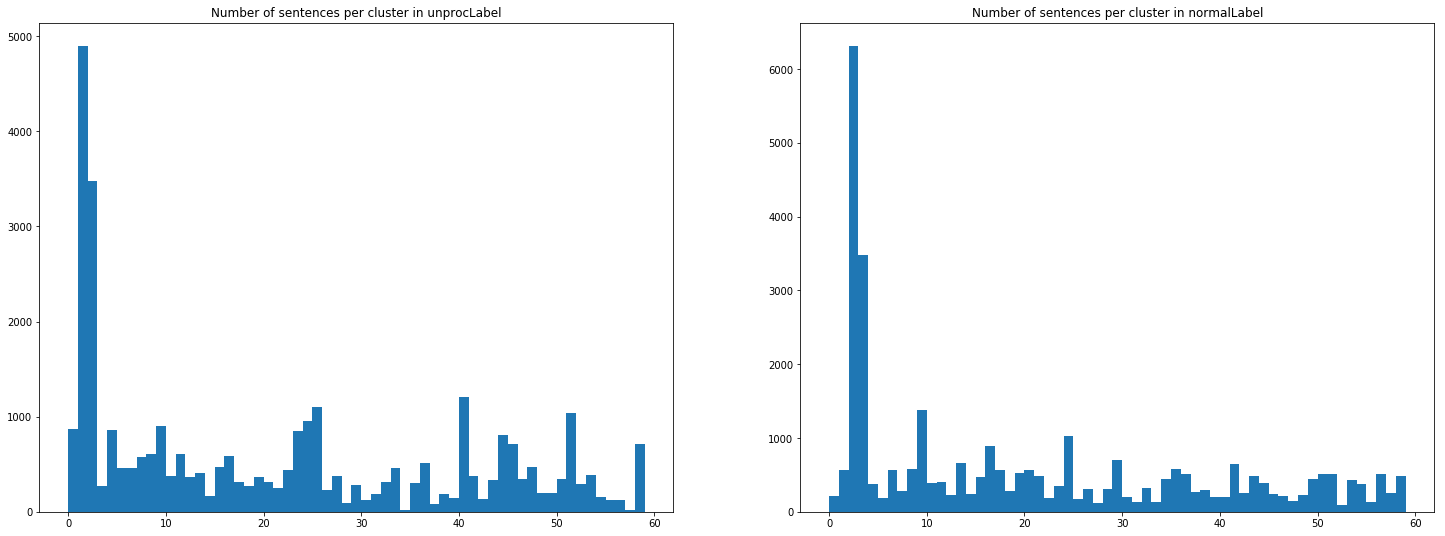

In [76]:
plt.subplots(figsize=(25,9))
ax = plt.subplot(1,2, 1)

ax.hist(necessaryData[procKeyList[0]], list(clustNums))

ax.set_title('Number of sentences per cluster in {0}'.format(procKeyList[0]))

ax = plt.subplot(1,2, 2)

ax.hist(necessaryData[procKeyList[1]], list(clustNums))
ax.set_title('Number of sentences per cluster in {0}'.format(procKeyList[1]))


## Compute the size of the Varaince in each Cluster

We define the variance of the input vectors with respect to different metrics, i.e. cosine and euclidean metric.

### Euclidean Metric:
For $x=(x_1,\dots,x_n) \subset \mathbb{R}^m$ being the input vectors we want to compute the disorder with respect to the mean, so for $\hat{x} = \frac{1}{n}\sum_{i=1}^n x_i$ we are interested in
\begin{align}
    s =\frac{1}{n} \sum_{i=1}^n (x_i - \hat{x})^2 \in \mathbb{R}^m
\end{align}
to get one scalar value we define
\begin{align}
    var(x) := \frac{1}{m} \sum_{j=1}^m s_j
\end{align}


In [77]:

procKeyList = ['unprocLabel','normalLabel'] # 'whitenLabel'
dataVectsKey = ['dataVectsUnProc', 'dataVectsNormal']

clustVar = {}
clustVar[procKeyList[0]] = []
clustVar[procKeyList[1]] = []
#clustVar[procKeyList[2]] = []



for procKeyID in range(len(procKeyList)):
    # 
    curr_clust = necessaryData[procKeyList[procKeyID]]
    dataMatrix = np.vstack(necessaryData[dataVectsKey[procKeyID]])
    
    clustNums = set(curr_clust)
    for clustNum in clustNums:
        # Create the matrix with all the vectors of cluster clustNum.
        vectOfClust = dataMatrix[(np.array(curr_clust) == clustNum),:]
        variance = np.var(vectOfClust, axis=0).sum()/vectOfClust.shape[1]
        clustVar[procKeyList[procKeyID]].append(variance)
        
        
# And the whole variance per procedure:
clustVar['absolute'] = [np.array(clustVar[procKeyList[i]]).sum() for i in range(len(procKeyList))]



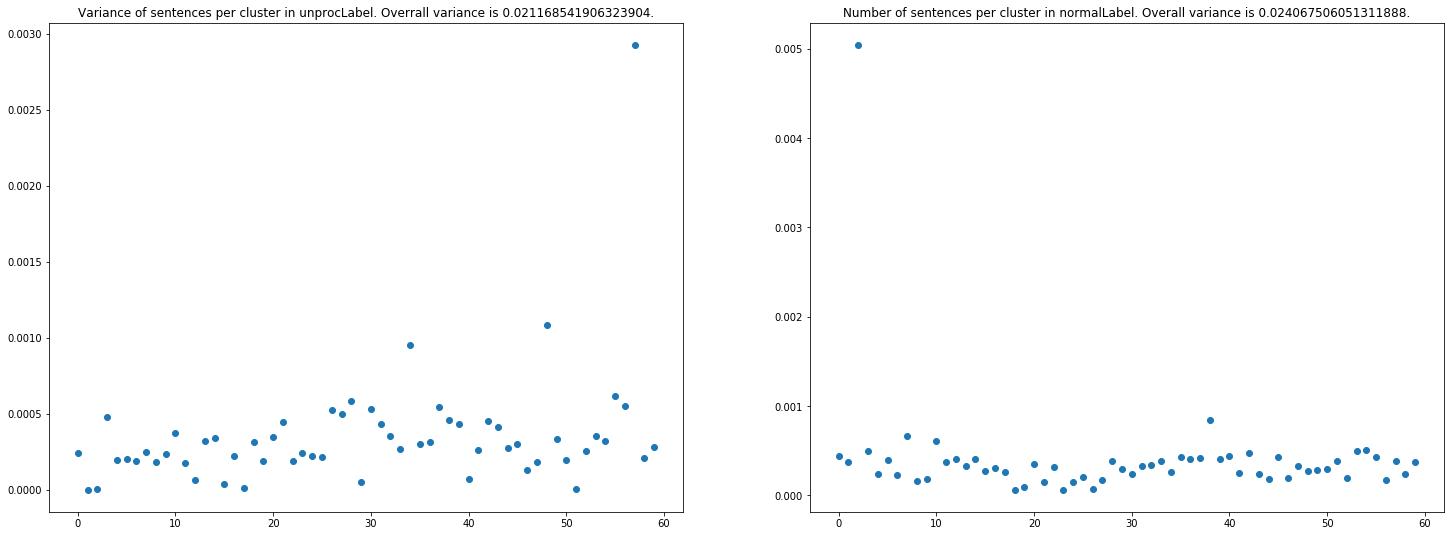

In [78]:
plt.subplots(figsize=(25,9))
ax = plt.subplot(1,2, 1)

ax.plot(list(clustNums),clustVar[procKeyList[0]], 'o')

ax.set_title('Variance of sentences per cluster in {0}. Overrall variance is {1}.'.format(procKeyList[0],clustVar['absolute'][0] ))

ax = plt.subplot(1,2, 2)


ax.plot(list(clustNums),clustVar[procKeyList[1]], 'o')
ax.set_title('Number of sentences per cluster in {0}. Overall variance is {1}.'.format(procKeyList[1], clustVar['absolute'][1] ))

plt.show()

## Investigation of the results
Let us take a closer look at the results. We want to read the following datasets:

1. The sentences with the most occurences one cluster.
2. The sentences with the highest variance per cluster (normal and not normalized).
3. Every cluster which has a template


Plot the sentences as a set with the annotation of the number of occurences.

In [86]:
## Fist please compose the set of sentences with the occurences at the side. Or a function of that type.
def reduce_sentences(sents: list):
    reduced_sents = {}
    for sent in sents:
        if sent in reduced_sents:
            reduced_sents[sent] +=1
        else:
            reduced_sents[sent] =1
    return reduced_sents

In [125]:

# 1. The sentence with the most occurences in one cluster.
# Compute the number of occurences:
procKeyList = ['unprocLabel','normalLabel']

numOfSentUnproc = [np.count_nonzero(np.array(necessaryData['unprocLabel']) == label) for label in set(necessaryData['unprocLabel'])]
numOfSentNormal = [np.count_nonzero(np.array(necessaryData['normalLabel']) == label) for label in set(necessaryData['normalLabel'])]



## Maximal number of sentence per cluster.

In [134]:
######## Unprocessed #######

# Maximal number:
investClust = list(set(necessaryData['unprocLabel']))[np.argmax(np.array(numOfSentUnproc))]
#investClust = list(set(necessaryData['unprocLabel']))[np.argmax(np.array(clustVar['unprocLabel']))]

# Cluster with templates:
#allTemplateCluster = list(set(np.array(necessaryData['unprocLabel'])[necessaryData['isTemplate']]))
#investClust = allTemplateCluster[4]

clusterSents = []
for i in range(len(necessaryData['sentence'])):
    currClust = necessaryData['unprocLabel'][i]
    if currClust == investClust:
        clusterSents.append(necessaryData['sentence'][i])
        

for key, val in reduce_sentences(clusterSents).items():
    print(key, val)


        

<SALUTATION> <LASTNAME> bittet um Rückruf. 4811
<SALUTATION> <FIRSTNAME> bittet um Rückruf. 10
<SALUTATION> <LASTNAME> bittet um Rückmeldung. 44
<SALUTATION> <LASTNAME>bittet um Rückruf. 1
<LASTNAME> <LASTNAME> bittet um Rückruf. 1
<SALUTATION> <LASTNAME> bitte um Rückruf. 1
<SALUTATION> <LASTNAME> bittet um Rückruf/Rückmeldung. 1
<SALUTATION> <LASTNAME> bittet um E-Mail. 3
<SALUTATION> <LASTNAME> wollte Ms. 1
<SALUTATION> <LASTNAME> wurde vermittelt. 2
<SALUTATION> <LASTNAME> wurde an <SALUTATION>n Wix vermittelt. 1
<SALUTATION> <LASTNAME> bittet um Rückruf. " 1
<SALUTATION> <LASTNAME> bittet um Rückruf ab morgen<SPACE> 1
<SALUTATION> <LASTNAME> bittet um Neulieferung. 1
<CONTACTPERSON> <LASTNAME> bittet um Rückruf. 2
<SALUTATION> <LASTNAME> bittet um Kontakt. 1
<SALUTATION> <LASTNAME> bittet um Rückmedlung. 1
Der<CONTACTPERSON>Anrufer<CONTACTPERSON>aus<CONTACTPERSON>Korea<CONTACTPERSON>möchte<CONTACTPERSON>es<CONTACTPERSON>später<CONTACTPERSON>erneut<CONTACTPERSON>versuchen.<CONTACTP

In [133]:
######## Normalized #######
# Maximal number:
investClust = list(set(necessaryData['normalLabel']))[np.argmax(np.array(numOfSentNormal))]

# Maximal Variance:
#investClust = list(set(necessaryData['normalLabel']))[np.argmax(np.array(clustVar['normalLabel']))]

# Cluster with templates:
#allTemplateCluster = list(set(np.array(necessaryData['normalLabel'])[necessaryData['isTemplate']]))
#investClust = allTemplateCluster[12]

clusterSents = []
for i in range(len(necessaryData['sentence'])):
    currClust = necessaryData['normalLabel'][i]
    if currClust == investClust:
        clusterSents.append(necessaryData['sentence'][i])
        

for key, val in reduce_sentences(clusterSents).items():
    print(key, val)

        

<SALUTATION> <LASTNAME> bittet um Rückruf. 4811
<SALUTATION> <FIRSTNAME> bittet um Rückruf. 10
<SALUTATION> <LASTNAME> bittet um Rückruf, bezüglich Giveaways. 1
<SALUTATION> <LASTNAME> bittet erneut um Rückruf. 272
<SALUTATION> <LASTNAME> bittet um Rückruf bez. 284
<SALUTATION> <LASTNAME> wird Ihnen eine Mail senden. 1
<SALUTATION> <LASTNAME> bittet um dringenden Rückruf. 11
<SALUTATION> <LASTNAME> bittet um Rückruf oder E-Mail. 4
<SALUTATION> <LASTNAME> bittet nochmals um Rückmeldung. 1
<SALUTATION> <LASTNAME> bittet um einen zeitnahen Rückruf. 2
<SALUTATION> <LASTNAME> bittet um Rückmeldung. 44
<SALUTATION> <LASTNAME> bittet um Rückruf bezüglich der Ipson GmbH.  1
<SALUTATION> <LASTNAME> bittet um Rückruf nächste Woche. 4
<SALUTATION> <LASTNAME> bittet morgen um Rückruf. 7
<SALUTATION> <LASTNAME> bittet um Rückmeldung bez. 8
<SALUTATION> <LASTNAME> bittet um Zusendung einer E-Mail. 6
<SALUTATION> <LASTNAME> bittet um Rückruf bezüglich des Unfalls. 1
<SALUTATION> <LASTNAME> bittet um 

## Maximal Variance

In [135]:
###########################
######## Unprocessed #######
#########################
# Maximal number:
#investClust = list(set(necessaryData['unprocLabel']))[np.argmax(np.array(numOfSentUnproc))]
investClust = list(set(necessaryData['unprocLabel']))[np.argmax(np.array(clustVar['unprocLabel']))]

# Cluster with templates:
#allTemplateCluster = list(set(np.array(necessaryData['unprocLabel'])[necessaryData['isTemplate']]))
#investClust = allTemplateCluster[4]

clusterSents = []
for i in range(len(necessaryData['sentence'])):
    currClust = necessaryData['unprocLabel'][i]
    if currClust == investClust:
        clusterSents.append(necessaryData['sentence'][i])
        

for key, val in reduce_sentences(clusterSents).items():
    print(key, val)


        

20. 2
16. 2
bis 12. 1
ab. 1
37. 1
um 16 Uhr. 1
oder am 07. 2
Am 04.12. 1
Er heiratet am 03. 2
19. 1
KW. 1
11.". 1
Am 10. 1
Januar 19. 1


In [136]:
############################
######## Normalized #######
##########################
# Maximal number:
#investClust = list(set(necessaryData['normalLabel']))[np.argmax(np.array(numOfSentNormal))]

# Maximal Variance:
investClust = list(set(necessaryData['normalLabel']))[np.argmax(np.array(clustVar['normalLabel']))]

# Cluster with templates:
#allTemplateCluster = list(set(np.array(necessaryData['normalLabel'])[necessaryData['isTemplate']]))
#investClust = allTemplateCluster[12]

clusterSents = []
for i in range(len(necessaryData['sentence'])):
    currClust = necessaryData['normalLabel'][i]
    if currClust == investClust:
        clusterSents.append(necessaryData['sentence'][i])
        

for key, val in reduce_sentences(clusterSents).items():
    print(key, val)

        

<SALUTATION> <LASTNAME> bittet um Rückruf. 4811
<SALUTATION> <FIRSTNAME> bittet um Rückruf. 10
<SALUTATION> <LASTNAME> bittet um Rückruf, bezüglich Giveaways. 1
<SALUTATION> <LASTNAME> bittet erneut um Rückruf. 272
<SALUTATION> <LASTNAME> bittet um Rückruf bez. 284
<SALUTATION> <LASTNAME> wird Ihnen eine Mail senden. 1
<SALUTATION> <LASTNAME> bittet um dringenden Rückruf. 11
<SALUTATION> <LASTNAME> bittet um Rückruf oder E-Mail. 4
<SALUTATION> <LASTNAME> bittet nochmals um Rückmeldung. 1
<SALUTATION> <LASTNAME> bittet um einen zeitnahen Rückruf. 2
<SALUTATION> <LASTNAME> bittet um Rückmeldung. 44
<SALUTATION> <LASTNAME> bittet um Rückruf bezüglich der Ipson GmbH.  1
<SALUTATION> <LASTNAME> bittet um Rückruf nächste Woche. 4
<SALUTATION> <LASTNAME> bittet morgen um Rückruf. 7
<SALUTATION> <LASTNAME> bittet um Rückmeldung bez. 8
<SALUTATION> <LASTNAME> bittet um Zusendung einer E-Mail. 6
<SALUTATION> <LASTNAME> bittet um Rückruf bezüglich des Unfalls. 1
<SALUTATION> <LASTNAME> bittet um 